### Content based on Recommendation System

In [3]:
import pandas as pd
import numpy as np
import tkinter as tk
import warnings

warnings.filterwarnings('ignore')

cols = 'user_id item_id rating timestamp'.split()
df = pd.read_csv('u.data',sep = '\t',names=cols)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
## number of users rated
df['user_id'].nunique()

943

In [5]:
cols_movie = ['item_id','title'] + [str(i) for i in range(22)]
movie_titles = pd.read_csv('u.item',sep = '|',names = cols_movie)
movie_titles.head()

,item_id,title,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,19,20,21
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.shape

(100000, 4)

In [7]:
movie_titles.shape

(1682, 24)

In [8]:
#concatination

data = movie_titles[['item_id','title']]
data.sample(10)

,item_id,title
763,764,If Lucy Fell (1996)
905,906,Oscar & Lucinda (1997)
338,339,Mad City (1997)
1391,1392,"Locusts, The (1997)"
495,496,It's a Wonderful Life (1946)
260,261,Air Bud (1997)
1489,1490,Fausto (1993)
1415,1416,No Escape (1994)
764,765,Boomerang (1992)
300,301,In & Out (1997)


# merging or concatenating or Joining
# pd.merge
# pd.concat
# df.join


In [9]:
data1 = pd.merge(df,movie_titles, on = 'item_id')
data.sample(20)

,item_id,title
837,838,In the Line of Duty 2 (1987)
98,99,Snow White and the Seven Dwarfs (1937)
203,204,Back to the Future (1985)
1094,1095,High School High (1996)
1267,1268,Bitter Moon (1992)
305,306,"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)"
851,852,"Bloody Child, The (1996)"
173,174,Raiders of the Lost Ark (1981)
319,320,Paradise Lost: The Child Murders at Robin Hood...
91,92,True Romance (1993)


# Exploratory Data Analysis (EDA)

In [10]:
data1['title'].value_counts().tail(20)

Wife, The (1995)                                     1
Careful (1992)                                       1
Normal Life (1996)                                   1
Nothing Personal (1995)                              1
Century (1993)                                       1
Bird of Prey (1996)                                  1
Further Gesture, A (1996)                            1
Lotto Land (1995)                                    1
Girl in the Cadillac (1995)                          1
Entertaining Angels: The Dorothy Day Story (1996)    1
Police Story 4: Project S (Chao ji ji hua) (1993)    1
Brothers in Trouble (1995)                           1
Crude Oasis, The (1995)                              1
Baton Rouge (1988)                                   1
Yankee Zulu (1994)                                   1
Fire on the Mountain (1996)                          1
Walk in the Sun, A (1945)                            1
Angela (1995)                                        1
Ripe (1996

# Average rating of each movies

In [11]:
for i in data1['title'].unique():
    print(i, data1['rating'][data1['title']==i].mean())

Kolya (1996) 3.9914529914529915
L.A. Confidential (1997) 4.161616161616162
Heavyweights (1994) 2.1538461538461537
Legends of the Fall (1994) 3.45679012345679
Jackie Brown (1997) 3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) 4.252577319587629
Hunt for Red October, The (1990) 3.8634361233480177
Jungle Book, The (1994) 3.5647058823529414
Grease (1978) 3.347058823529412
Remains of the Day, The (1993) 3.94
Men in Black (1997) 3.745874587458746
Romy and Michele's High School Reunion (1997) 3.061224489795918
Star Trek: First Contact (1996) 3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995) 2.8947368421052633
Batman Forever (1995) 2.6666666666666665
Only You (1994) 3.1538461538461537
Age of Innocence, The (1993) 3.3846153846153846
Sabrina (1995) 3.5
Just Cause (1995) 3.142857142857143
Endless Summer 2, The (1994) 2.5
Man Without a Face, The (1993) 3.5441176470588234
Sabrina (1954) 3.796875
Die Hard (1988) 3.8724279835390947


In [12]:
# Groupby

data1.groupby('title')['rating'].mean().sort_values(ascending = False).head(20)

title
They Made Me a Criminal (1939)                            5.000000
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Saint of Fort Washington, The (1993)                      5.000000
Someone Else's America (1995)                             5.000000
Star Kid (1997)                                           5.000000
Great Day in Harlem, A (1994)                             5.000000
Aiqing wansui (1994)                                      5.000000
Santa with Muscles (1996)                                 5.000000
Prefontaine (1997)                                        5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Pather Panchali (1955)                                    4.625000
Some Mother's Son (1996)                                  4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Anna (1996)                                               4.500000
Everest (1998)                                          

In [13]:
# puting the data1 in dataframe by creating one

rating = pd.DataFrame(data1.groupby('title')['rating'].mean())
rating.head(20)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [14]:
# How many times movie is rated

rating['count'] = data1['title'].value_counts()
rating.head(20)

,rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


# How many movie are their which are rated less then 10 times

In [15]:
sum(rating['count']<10)

520

# How many movie are their which are rated more then 10 times

In [16]:
sum(rating['count']>10)

1111

# Graph for this result

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

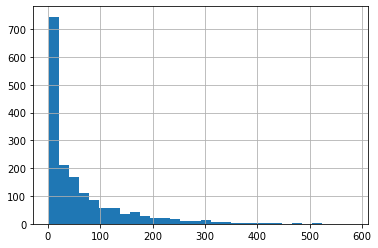

In [18]:
rating['count'].hist(bins=30)

In [19]:
# Similarity data

# Pivot TAble

In [20]:
pivot_df = data1.pivot_table(index = 'user_id',columns ='title',values = 'rating')
pivot_df.head(20)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
rating.sort_values('count', ascending = False).head(20)

,rating,count
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [22]:
sw_ratings = pivot_df["Star Wars (1977)"]
sw_ratings

user_id
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 943, dtype: float64

In [23]:
# correlation
similarity_sw = pivot_df.corrwith(sw_ratings)
similarity_sw

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
� k�ldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [24]:
# creating DATAFRAME

corr_df = pd.DataFrame(similarity_sw, columns = ['correlation'])
corr_df.sort_values('correlation')

,correlation
title,
Frankie Starlight (1995),-1.0
Roseanna's Grave (For Roseanna) (1997),-1.0
Two Deaths (1995),-1.0
I Like It Like That (1994),-1.0
Theodore Rex (1995),-1.0
...,...
Wonderland (1997),NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN
Yankee Zulu (1994),NaN


# How to remove the missing DATA

In [25]:
# remove all the missing values
corr_df.dropna(inplace = True)
corr_df.sort_values('correlation')

,correlation
title,
Frankie Starlight (1995),-1.0
Roseanna's Grave (For Roseanna) (1997),-1.0
Two Deaths (1995),-1.0
I Like It Like That (1994),-1.0
Theodore Rex (1995),-1.0
...,...
Golden Earrings (1947),1.0
Full Speed (1996),1.0
Stripes (1981),1.0


# Get the correlation data with count

In [26]:
corr_df = corr_df.join(rating['count'])
corr_df.head()

,correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [27]:
# Sorting

corr_df.sort_values('correlation', ascending = False).head(20)

,correlation,count
title,,
Hollow Reed (1996),1.0,6
Stripes (1981),1.0,5
Star Wars (1977),1.0,583
"Beans of Egypt, Maine, The (1994)",1.0,2
Safe Passage (1994),1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5
"Outlaw, The (1943)",1.0,2
"Line King: Al Hirschfeld, The (1996)",1.0,2
Hurricane Streets (1998),1.0,9


In [28]:
corr_df[corr_df['count']>200].sort_values('correlation',ascending = False).head(30)

,correlation,count
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
L.A. Confidential (1997),0.319065,297
E.T. the Extra-Terrestrial (1982),0.303619,300
Batman (1989),0.289344,201


# For ANOTHER Movie

In [33]:
ter_ratings = pivot_df["Terminator 2: Judgment Day (1991)"]
similarity_ter = pivot_df.corrwith(ter_ratings)
corr_df_ter = pd.DataFrame(similarity_ter, columns = ['correlation'])
corr_df_ter.dropna(inplace = True)
corr_df_ter = corr_df_ter.join(rating['count'])
corr_df_ter[corr_df_ter['count']>200].sort_values('correlation',ascending = False).head()

,correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301
True Lies (1994),0.516728,208
Back to the Future (1985),0.480123,350
Speed (1994),0.449709,230


In [32]:
corr_df_ter[(corr_df_ter['count']>200)&(corr_df_ter['correlation']>0.55)].sort_values('correlation',ascending=False)

,correlation,count
title,,
Terminator 2: Judgment Day (1991),1.000000,295
"Terminator, The (1984)",0.562853,301


# How to Rechange the index

In [30]:
df.reindex(range(10,100))

,user_id,item_id,rating,timestamp
10,62,257,2,879372434
11,286,1014,5,879781125
12,200,222,5,876042340
13,210,40,3,891035994
14,224,29,3,888104457
...,...,...,...,...
95,119,1153,5,874781198
96,62,498,4,879373848
97,62,382,3,879375537
98,28,209,4,881961214


# GUI

In [ ]:
import tkinter as tk
app = tk.Tk()
app.title('Movie Recommendation System')
app.geometry('500x300')
tk.Label(app, text='Movie You Watched').place(x=15,y=50)
tk.Label(app, text='Movie Recommended For You').place(x=15,y=180)
tk.Label(app, text='Also Try This Movie').place(x=15,y=240)

movie_var =tk.Variable(app)
tk.Entry(app, textvariable=movie_var,width=28).place(x=210,y=50)

recommend_var = tk.Variable(app)
recommend_var.set('Type movie name...')
tk.Label(app, textvariable=recommend_var).place(x=220,y=180)


also__try_var = tk.Variable(app)
also__try_var.set('Type movie name...')
tk.Label(app, textvariable=also__try_var).place(x=220,y=240)

def find_recommendation():
    movie = movie_var.get().lower()
    print(movie)
movie_titles['title'][movie_titles['title'].apply(lambda x: movie in x.lower())].values(0)






app.mainloop()